In [1]:
from numpy.random import randn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#to make api calls to weather 
from datetime import datetime
import requests
import json

pd.options.display.max_rows = 20
np.set_printoptions(precision=4)

plt.rc('figure', figsize=(10, 6))

#source Tesla dataset "https://www.kaggle.com/datasets/ibriiee/tesla-autonomous-deaths-data-updated-2023"
#source Api for weather forcasting "https://open-meteo.com/"

In [2]:
file = pd.read_csv("Tesla Deaths - Deaths.csv")

In [3]:
#data cleaning
file = file.iloc[:294,:16]
file

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot_claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-,-
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-,-
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-,-
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-,-
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,5.0,2014.0,7/14/2014,USA,CA,Tesla kills motorcyclist,1.0,-,-,1,-,-,-,-,-,-
290,4.0,2014.0,7/4/2014,USA,CA,Thief crashes stolen Tesla,1.0,1,-,-,-,1,-,-,-,-
291,3.0,2014.0,7/4/2014,USA,CA,Tesla rear ends stopped car,3.0,-,-,3,-,-,-,-,-,-
292,2.0,2013.0,11/2/2013,USA,CA,Tesla kills cyclist,1.0,-,-,-,1,1,-,-,-,-


<AxesSubplot:xlabel='Country'>

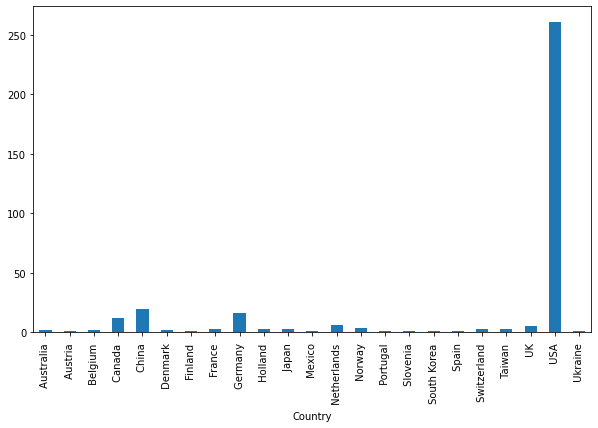

In [4]:
deathCountry = file["Deaths"].groupby(file["Country"]).sum()
deathCountry.plot.bar()
#We can clearly examain that the significant number of Tesla trafic accidents have occured on USA we are going to consequnetly
#going to study the trafic accidents in the USA

In [5]:
USA_data = file[file.Country == " USA " ]
deathCountryUSA = USA_data["Deaths"].groupby(USA_data["State"]).sum()

print("total deaths World", deathCountry.sum())
print("total deaths USA" , deathCountryUSA.sum())
ratio = (deathCountryUSA.sum()/deathCountry.sum())*100
print("percentage of deaths in USA", ratio)

total deaths World 353.0
total deaths USA 261.0
perentage of deaths in USA 73.93767705382436


<AxesSubplot:xlabel='State'>

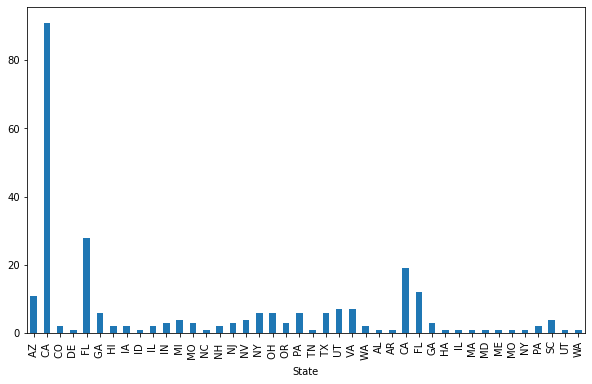

In [6]:
deathCountryUSA.plot.bar()
#We can see that the majority of the trafic accidents occure on the state of Californi

In [7]:
print("deaths in California",deathCountryUSA[" CA "] )
print("total deaths USA" , deathCountryUSA.sum())

Usa_ratio = (deathCountryUSA[" CA "]/deathCountryUSA.sum())* 100
world_ratio = (deathCountryUSA[" CA "]/deathCountry.sum())* 100

print("Percentage of death in California", Usa_ratio)
print("Percentage of death in California vs world", world_ratio)
#we can see how studing The state of California

deaths in California 91.0
total deaths USA 261.0
Percentage of death in California 34.86590038314176
Percentage of death in California vs world 25.77903682719547


<AxesSubplot:xlabel='Date'>

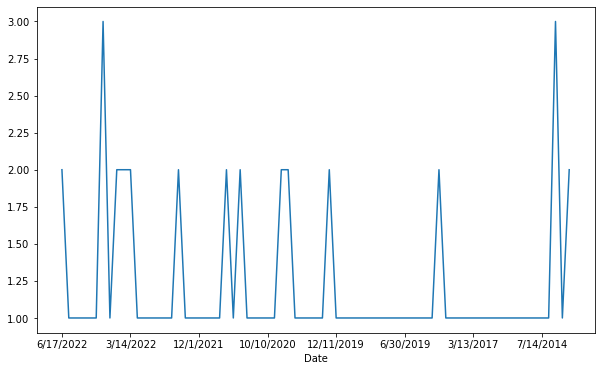

In [8]:
california = file[file.State == " CA " ]
#cean data:remove state
#we are going to do a relabeling by eliminating the Case# field 
california = california.drop(columns = "Case #")

#we have created a time series so we can introduce a weather report to the data
time_series_california = california.set_index("Date")
time_series_california["Deaths"].plot()

In [9]:
time_series_california

,Year,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot_claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
Date,,,,,,,,,,,,,,
6/17/2022,2022.0,USA,CA,Head-on collision,2.0,1,1,-,-,2,-,-,-,-
6/14/2022,2022.0,USA,CA,Tesla moves into opposite lane and head-on cr...,1.0,-,-,1,-,-,-,-,-,-
6/13/2022,2022.0,USA,CA,Two-car collision,1.0,1,-,-,-,1,-,-,-,-
6/7/2022,2022.0,USA,CA,DUI crash,1.0,-,-,-,1,1,-,-,-,-
5/28/2022,2022.0,USA,CA,Speeding tesla crashes into tree,1.0,1,-,-,-,1,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/14/2014,2014.0,USA,CA,Tesla kills motorcyclist,1.0,-,-,1,-,-,-,-,-,-
7/4/2014,2014.0,USA,CA,Thief crashes stolen Tesla,1.0,1,-,-,-,1,-,-,-,-
7/4/2014,2014.0,USA,CA,Tesla rear ends stopped car,3.0,-,-,3,-,-,-,-,-,-


In [10]:
endpoint = "https://archive-api.open-meteo.com/v1/archive?latitude=34.05&longitude=-118.24"
start_date = "&start_date="
end_date = "&end_date="
end = "&daily=temperature_2m_mean,precipitation_sum&timezone=auto"

precipitation = []
temperature = []

for date in time_series_california.index:
    date_object = datetime.strptime(date, '%m/%d/%Y').date()
    date_object.strftime("%Y-%m-%d")
    fetch = endpoint + start_date + str(date_object) + end_date + str(date_object) + end
    response = requests.get(fetch)
    data = response.json()
    precipitation.append(int(data["daily"]["precipitation_sum"][0]))
    temperature.append(int(data["daily"]["temperature_2m_mean"][0]))

In [11]:
time_series_california["temperature"] = temperature
time_series_california["precipitation"] = precipitation

In [12]:
time_series_california

,Year,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot_claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,temperature,precipitation
Date,,,,,,,,,,,,,,,,
6/17/2022,2022.0,USA,CA,Head-on collision,2.0,1,1,-,-,2,-,-,-,-,19,0
6/14/2022,2022.0,USA,CA,Tesla moves into opposite lane and head-on cr...,1.0,-,-,1,-,-,-,-,-,-,22,0
6/13/2022,2022.0,USA,CA,Two-car collision,1.0,1,-,-,-,1,-,-,-,-,21,0
6/7/2022,2022.0,USA,CA,DUI crash,1.0,-,-,-,1,1,-,-,-,-,22,0
5/28/2022,2022.0,USA,CA,Speeding tesla crashes into tree,1.0,1,-,-,-,1,-,-,-,-,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/14/2014,2014.0,USA,CA,Tesla kills motorcyclist,1.0,-,-,1,-,-,-,-,-,-,24,3
7/4/2014,2014.0,USA,CA,Thief crashes stolen Tesla,1.0,1,-,-,-,1,-,-,-,-,26,0
7/4/2014,2014.0,USA,CA,Tesla rear ends stopped car,3.0,-,-,3,-,-,-,-,-,-,26,0


0.3466666666666667

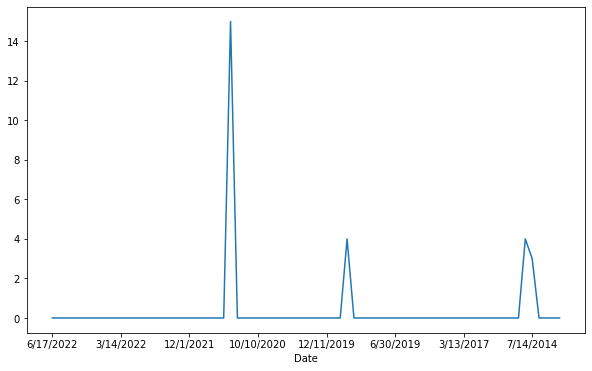

In [13]:
time_series_california["precipitation"].plot()
time_series_california["precipitation"].mean()

In [14]:
noRainAccidents = len(time_series_california[time_series_california["precipitation"] == 0])
allAccidents = len(time_series_california)

print("no rain accidents", noRainAccidents)
print("all accidents in CA", allAccidents)

no rain accidents 71
all accidents in CA 75


<AxesSubplot:xlabel='Date'>

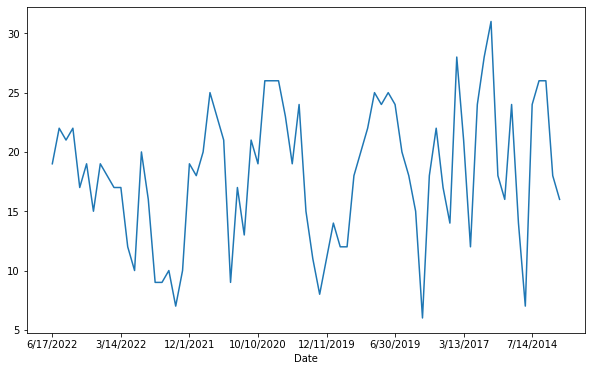

In [15]:
time_series_california["temperature"].plot()

In [16]:
autopilotCrash = time_series_california[time_series_california.Autopilot_claimed == "  1 "]

crashes_with_autopilot = (len(autopilotCrash)/len(california))*100
print("total autopilot CA crashes",len(autopilotCrash))
print(crashes_with_autopilot)

total autopilot CA crashes 10
13.333333333333334


<AxesSubplot:xlabel='Date'>

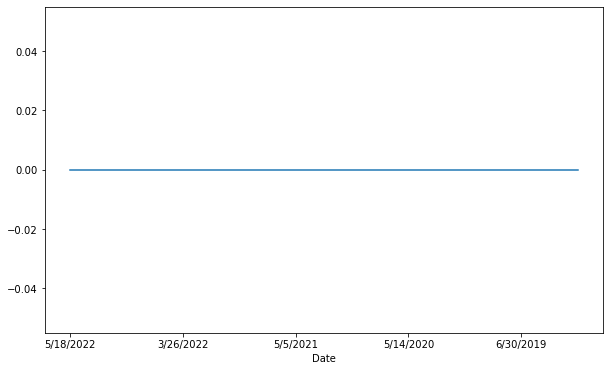

In [17]:
autopilotCrash["precipitation"].plot()

<AxesSubplot:xlabel='Date'>

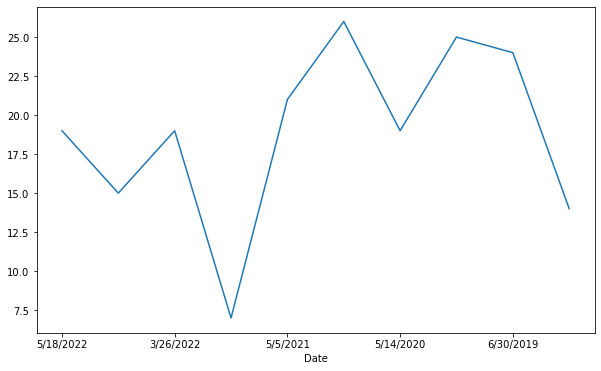

In [18]:
autopilotCrash["temperature"].plot()

<AxesSubplot:xlabel='Date'>

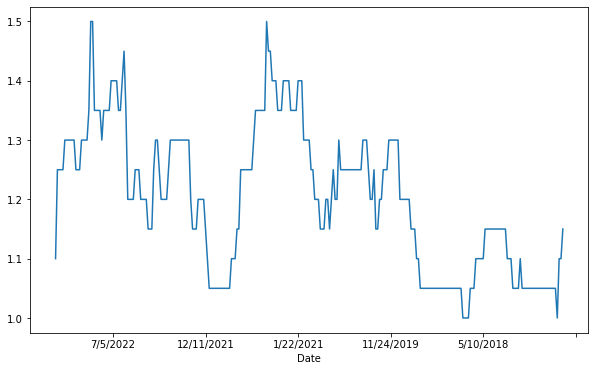

In [19]:
alldata_time_series = file.set_index("Date")
alldata_time_series["Deaths"].rolling(20).mean().plot()